## 모델 저장과 복원
---
- 방법1) 모델전체 저장(모델 구조 + 가중치 + 변수)
    * save_model()
    * 복원시 추가 작업 필요 없이 모델 파일 로딩해서 사용 가능
    
- 방법2) 가중치만 저장
    * save_weights()
    * 복원시 모델 구조(Architechture) 생성 후 가중치 적용

- 방법3) 모델 전체 또는 가중치 자동 저장
    * fit()에서 ModelCheckPoint Event에 대한 callback 등록
    * save_best_only = True : 모니터링 기준에 따라서 좋은 성능의 모델만 저장
    * save_weight_only = True : 가중치만 저장

- 파일 또는 폴더
    * 파일 확장자가 없으면 폴더로 저장
    * 파일 확장자가
        - h5 / hdf5 : HDF5 포맷으로 모델 또는 가중치 저장
        - ckpf : 체크파일형태로 저장
        - pd : 모델 저장

## [1] 데이터 준비
---

In [1]:
from sklearn.datasets import load_iris
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed, plot_model
import numpy as np

## [1] 데이터 준비 및 로딩
---

In [2]:
iris=load_iris()

In [3]:
x_train=iris.data
y_train=iris.target

print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')

x_train.shape : (150, 4), y_train.shape : (150,)


In [4]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

## [2] 데이터 전처리
---

In [5]:
# Feature => 꽃잎의 길이, 너비
x_train=x_train[:, 2:]
x_train.shape

(150, 2)

In [6]:
# Target => 문자 => 수치화

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lencoder = LabelEncoder()
lencoder.fit(y_train).transform(y_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
ohencoder = OneHotEncoder()
y_train=ohencoder.fit(y_train.reshape(-1,1)).transform(y_train.reshape(-1,1))
y_train=y_train.toarray()

In [9]:
x_train.shape, y_train.shape, y_train[0]

((150, 2), (150, 3), array([1., 0., 0.]))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_train=scaler.fit(x_train).transform(x_train)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_train, y_train,
                                                   stratify=y_train) 

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

In [14]:
print('x_train.shape : , x_train.shape')
print('x_test.shape : , x_test.shape')
print('x_val.shape : , x_val.shape')

x_train.shape : , x_train.shape
x_test.shape : , x_test.shape
x_val.shape : , x_val.shape


In [15]:
x_train[0], x_test[0], x_val[0]

(array([0.87643312, 1.44883158]),
 array([-1.34022653, -1.18381211]),
 array([-1.34022653, -1.3154443 ]))

## [3] 모델 구성 및 생성
---
- 입력 데이터 : 2개 Feature
- 출력 데이터 : 3개 품종
- 학습 방법 : 분류 - 다중분류

In [16]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

In [17]:
irisModel=Sequential(name='irisModel')

In [18]:
irisModel.add(Dense(9, activation='relu', input_shape=(2,)))
irisModel.add(Dense(3, activation='softmax'))

In [19]:
irisModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 27        
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


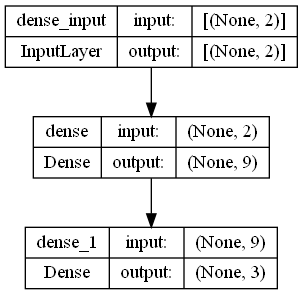

In [20]:
plot_model(irisModel, show_shapes=True)

In [21]:
## 모델 생성
irisModel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

## [4] 모델 학습

In [22]:
irisModel.fit(x_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 1.1631 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 1.1498 - accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 1.1365 - accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1.1237 - accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 1.1117 - accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 1.0992 - accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 1.0868 - accuracy: 0.3333
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0749 - accuracy: 0.3333
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0632 - accuracy: 0.3214
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0517 - accuracy: 0.3214
Epoch 11/100
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.8333
Epoch 85/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.8333
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.8333
Epoch 87/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.8333
Epoch 88/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.8333
Epoch 89/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.8452
Epoch 90/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5352 - accuracy: 0.8452
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.8452
Epoch 92/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.8452
Epoch 93/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.8452
Epoch 94/100
3/3 [===============

## [5] 평가

In [23]:
irisModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.9211


[0.5129058957099915, 0.9210526347160339]

## [6] 예측